In [6]:
import pandas as pd
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# === Charger train.csv ===
df = pd.read_csv("../data/train.csv")  # Remonté d'un niveau

# Simplifier en binaire : 0 = normal, 1 = retinopathy
df["label"] = df["diagnosis"].apply(lambda x: 0 if x == 0 else 1)

print(df.head())

# === Dataset personnalisé ===
class RetinoDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.data["label"] = self.data["diagnosis"].apply(lambda x: 0 if x == 0 else 1)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 0] + ".png"  # id_code + extension
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        label = int(self.data.iloc[idx]["label"])

        if self.transform:
            image = self.transform(image)

        return image, label

# === Transforms (prétraitement) ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # adapter à ResNet
    transforms.ToTensor(),
])

# === Créer dataset et dataloader ===
train_dataset = RetinoDataset("../data/train.csv", "../data/train_images", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Exemple : récupérer un batch
images, labels = next(iter(train_loader))
print(images.shape, labels[:10])


        id_code  diagnosis  label
0  000c1434d8d7          2      1
1  001639a390f0          4      1
2  0024cdab0c1e          1      1
3  002c21358ce6          0      0
4  005b95c28852          0      0
torch.Size([32, 3, 224, 224]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])


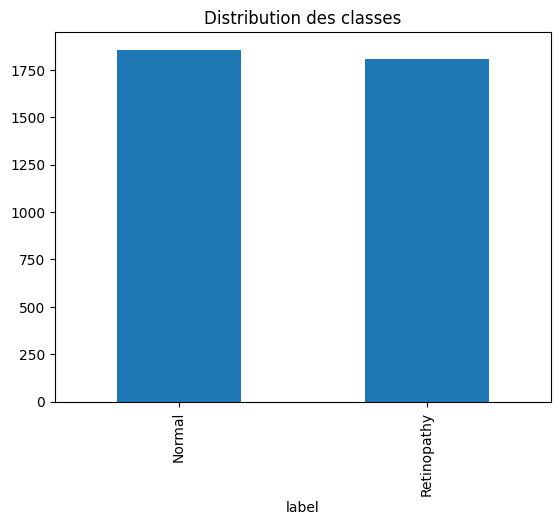

In [7]:
import matplotlib.pyplot as plt

# Nombre d’images normales vs rétinopathie
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution des classes')
plt.xticks([0,1], ['Normal','Retinopathy'])
plt.show()


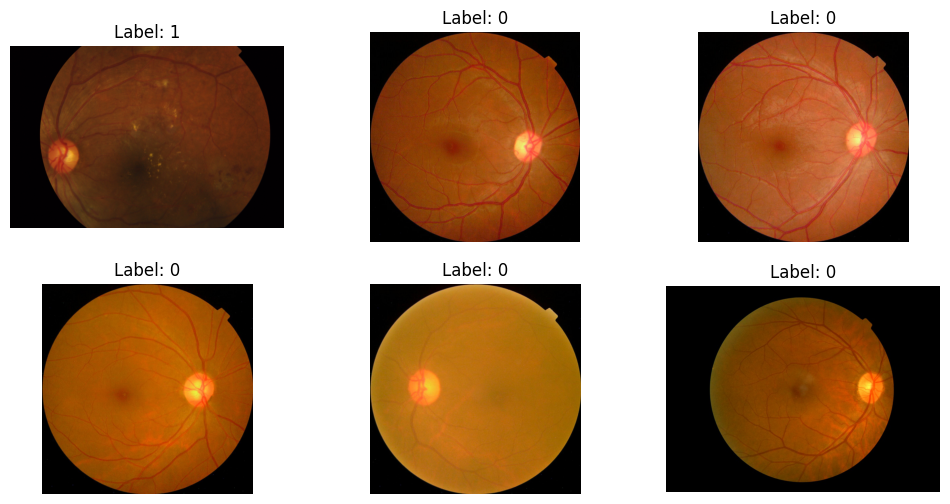

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

sample_images = df.sample(6)  # 6 images aléatoires
plt.figure(figsize=(12,6))
for i, (_, row) in enumerate(sample_images.iterrows()):
    img = Image.open(f"../data/train_images/{row['id_code']}.png")
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(f"Label: {row['label']}")
    plt.axis('off')
plt.show()


In [9]:
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])